# Dataset Loading

### 1. Loading the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

Output: Loads the Iris dataset into a Bunch object (like a dictionary).

iris.keys() lists all available components in the dataset.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target.shape

(150,)

## 3) Data Exploration

### (1) The bellow graph shows relationship between the sepal length and width.

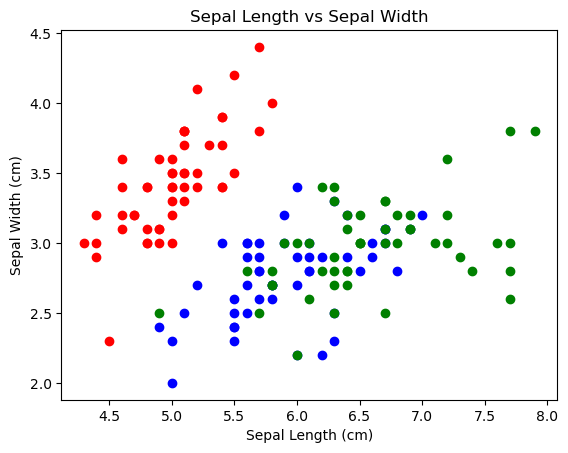

In [11]:
X = iris.data[:,:2] # Take out the information of the sepal length and width. 
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.scatter(X[y==2,0],X[y==2,1],color='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

### (2) Now we will check relationship between the petal length and width.

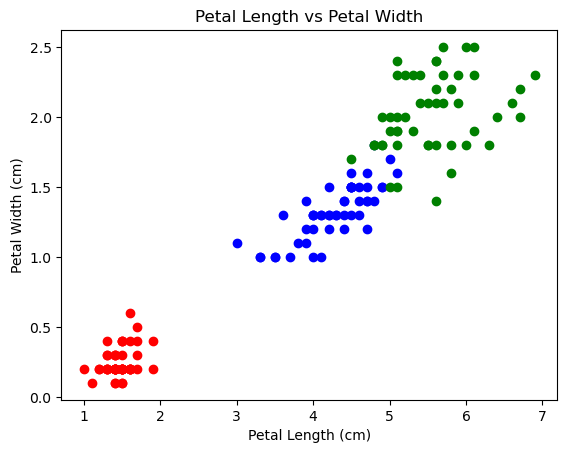

In [12]:
X = iris.data[:,2:]
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.scatter(X[y==2,0],X[y==2,1],color='green')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and
accurate Predictions over the Sepal.

In [13]:
X = iris.data 

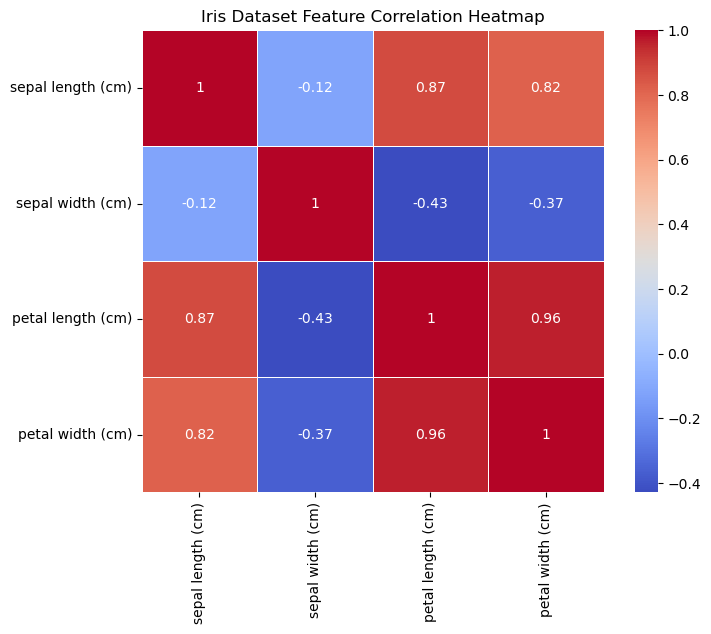

In [14]:
import seaborn as sns 
correlation_matrix = np.corrcoef(iris.data, rowvar=False)

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=.5, 
            square=True, 
            xticklabels=iris.feature_names, 
            yticklabels=iris.feature_names)
plt.title('Iris Dataset Feature Correlation Heatmap')
plt.show()

### Observation 

From the correlation heatmap of the Iris dataset, the following observations can be made:

* **Strong Positive Correlation:**
    * Petal Length and Petal Width: The correlation coefficient is 0.96, indicating an extremely strong positive relationship. This means as petal length increases, petal width also tends to increase significantly.
    * Sepal Length and Petal Length/Petal Width: The correlation coefficients are 0.87 and 0.82, respectively, showing strong positive relationships. Longer sepals are associated with longer and wider petals.

* **Weak or No Correlation:**
    * Sepal Width and Other Features: Sepal width shows weak or negative correlations with other features. For example:
    * Sepal Length: Correlation of -0.12 (very weak negative).
    * Petal Length/Petal Width: Correlations of -0.43 and -0.37, respectively (moderate negative relationships).

* **Diagonal Values:**
    * The diagonal of the heatmap shows 1.0, which is expected as each feature is perfectly correlated with itself.


In [15]:
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# Split the dataset into features (X) and target labels (y)
X = iris.data  # Features
y = iris.target  # Target Labels

# Define the desired test set size or the train-test split ratio
test_size = 0.3  # 30% of the dataset will be used for testing
# Alternatively, you can specify the train_test_split ratio directly:
# train_test_split_ratio = 0.7  # 70% of the dataset will be used for training

# Use train_test_split function to divide the dataset into training and testing sets
# Shuffle the data before splitting if desired (default is True)
#fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=48)

# Print the sizes of the training and testing sets
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 105 samples
Test set size: 45 samples


In [16]:
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN) classifier implementation

# Instantiate a KNN classifier with k=3 (considering 3 nearest neighbors for classification)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Make predictions on the testing data using the trained KNN classifier
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2,
       1])

In [18]:
from sklearn.metrics import accuracy_score  # For evaluating model performance

# Print the overall accuracy score (fraction of correctly classified instances)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9555555555555556


In [23]:
import pandas as pd

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Correct': y_test == y_pred
})

# Filter to show only misclassified samples
misclassified = results[results['Correct'] == False]
print(misclassified)

    Actual  Predicted  Correct
7        2          1    False
18       1          2    False


k =  1  Accuracy Score: 0.9555555555555556
k =  2  Accuracy Score: 0.9111111111111111
k =  3  Accuracy Score: 0.9555555555555556
k =  4  Accuracy Score: 0.9333333333333333
k =  5  Accuracy Score: 0.9555555555555556
k =  6  Accuracy Score: 0.9333333333333333
k =  7  Accuracy Score: 0.9555555555555556
k =  8  Accuracy Score: 0.9555555555555556
k =  9  Accuracy Score: 1.0
k =  10  Accuracy Score: 0.9555555555555556


([<matplotlib.axis.XTick at 0x1361eb7a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

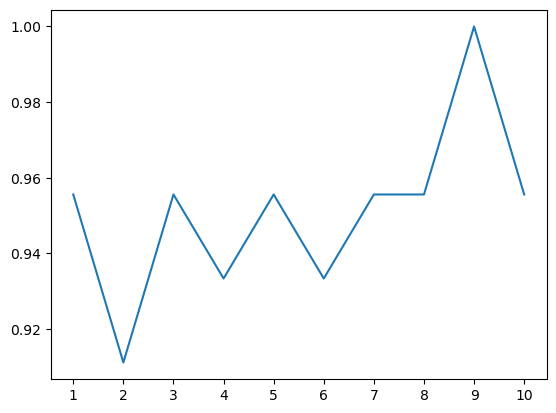

In [19]:
# Define the range of K values
k_values = np.arange(1, 11)

# Initialize a NumPy array to store the accuracy scores
accuracy_scores = np.zeros(k_values.shape)

# Iterate over K values
for i, k in enumerate(k_values):
    # Create a K-Nearest Neighbors classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = knn.predict(X_test)
    
    # Compute and store the accuracy score corresponding to the current K value
    accuracy_scores[i] = accuracy_score(predictions, y_test)
    
    print("k = ", k, " Accuracy Score:", accuracy_scores[i])

# Plot the relationship between accuracy and K values using matplotlib
plt.plot(k_values, accuracy_scores)
plt.xticks(np.arange(1, 11))

In [20]:
X_Sepal = iris.data[:, :2]  # Take out the information of the sepal Length and width.
X_Petal = iris.data[:, 2:]  # Take out the information of the Petal Length and width.
y = iris.target  # Target Labels
test_size = 0.3  # 30% of the dataset will be used for testing
X_train_Sepal, X_test_Sepal, y_train_Sepal, y_test_Sepal = train_test_split(X_Sepal, y, test_size=test_size, random_state=0)  # sepal
X_train_Petal, X_test_Petal, y_train_Petal, y_test_Petal = train_test_split(X_Petal, y, test_size=test_size, random_state=0)  # petals

In [21]:
knn_Sepal = KNeighborsClassifier(n_neighbors=3)
knn_Sepal.fit(X_train_Sepal, y_train_Sepal)
prediction = knn_Sepal.predict(X_test_Sepal)
print('The accuracy of the KNN using Sepal is:', accuracy_score(prediction, y_test_Sepal))

knn_Petal = KNeighborsClassifier(n_neighbors=3)
knn_Petal.fit(X_train_Petal, y_train_Petal)
prediction = knn_Petal.predict(X_test_Petal)
print('The accuracy of the KNN using Petal is:', accuracy_score(prediction, y_test_Petal))

The accuracy of the KNN using Sepal is: 0.7333333333333333
The accuracy of the KNN using Petal is: 0.9777777777777777
